In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

In [2]:
import sys

In [3]:
import time,os,warnings

In [4]:
from collections import Counter

In [5]:
warnings.filterwarnings("ignore")
print("python {}".format(sys.version))

python 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]


In [6]:
print("keras version {}".format(keras.__version__))

keras version 2.10.0


In [16]:
print("tensorflow version {}".format(tf.__version__))

tensorflow version 2.10.1


In [30]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth=True

config.gpu_options.per_process_gpu_memory_fraction = 0.95
config.gpu_options.visible_device_list = "0"
sess = tf.compat.v1.Session(config=config)

In [31]:
def set_seed(sd=123):
    from numpy.random import seed
    from tensorflow import set_random_seed
    import random as rn
    seed(sd)
    rn.seed(sd)
    set_random_seed(sd)

In [37]:
dir_Flickr_jpg = "C:/Users/ishwa/Desktop/imageCaptionGenerator/Flickr_Data/Flickr_Data/Images"
dir_Flickr_text = "C:/Users/ishwa/Desktop/imageCaptionGenerator/Flickr_Data/Flickr_Data/Flickr_TextData/Flickr8k.token.txt"

jpgs = os.listdir(dir_Flickr_jpg)
print("The number of jpg files in Flicker8k : {}".format(len(jpgs)))

The number of jpg files in Flicker8k : 8091


In [39]:
file = open(dir_Flickr_text,'r')
text = file.read()
file.close()

datatxt = []
for line in text.split('\n'):
    col = line.split('\t')
    if len(col) == 1:
        continue
    w = col[0].split("#")
    datatxt.append(w+ [col[1].lower()])
df_txt = pd.DataFrame(datatxt,columns=["filename","index","caption"])

uni_filenames = np.unique(df_txt.filename.values)
print("The number of unique files: {}".format(len(uni_filenames)))
print("The distribution of the number of captions for each image:")
Counter(Counter(df_txt.filename.values).values())

The number of unique files: 8092
The distribution of the number of captions for each image:


Counter({5: 8092})

In [40]:
df_txt[:6]

filename index  \
0  1000268201_693b08cb0e.jpg     0   
1  1000268201_693b08cb0e.jpg     1   
2  1000268201_693b08cb0e.jpg     2   
3  1000268201_693b08cb0e.jpg     3   
4  1000268201_693b08cb0e.jpg     4   
5  1001773457_577c3a7d70.jpg     0   

                                             caption  
0  a child in a pink dress is climbing up a set o...  
1              a girl going into a wooden building .  
2   a little girl climbing into a wooden playhouse .  
3  a little girl climbing the stairs to her playh...  
4  a little girl in a pink dress going into a woo...  
5         a black dog and a spotted dog are fighting

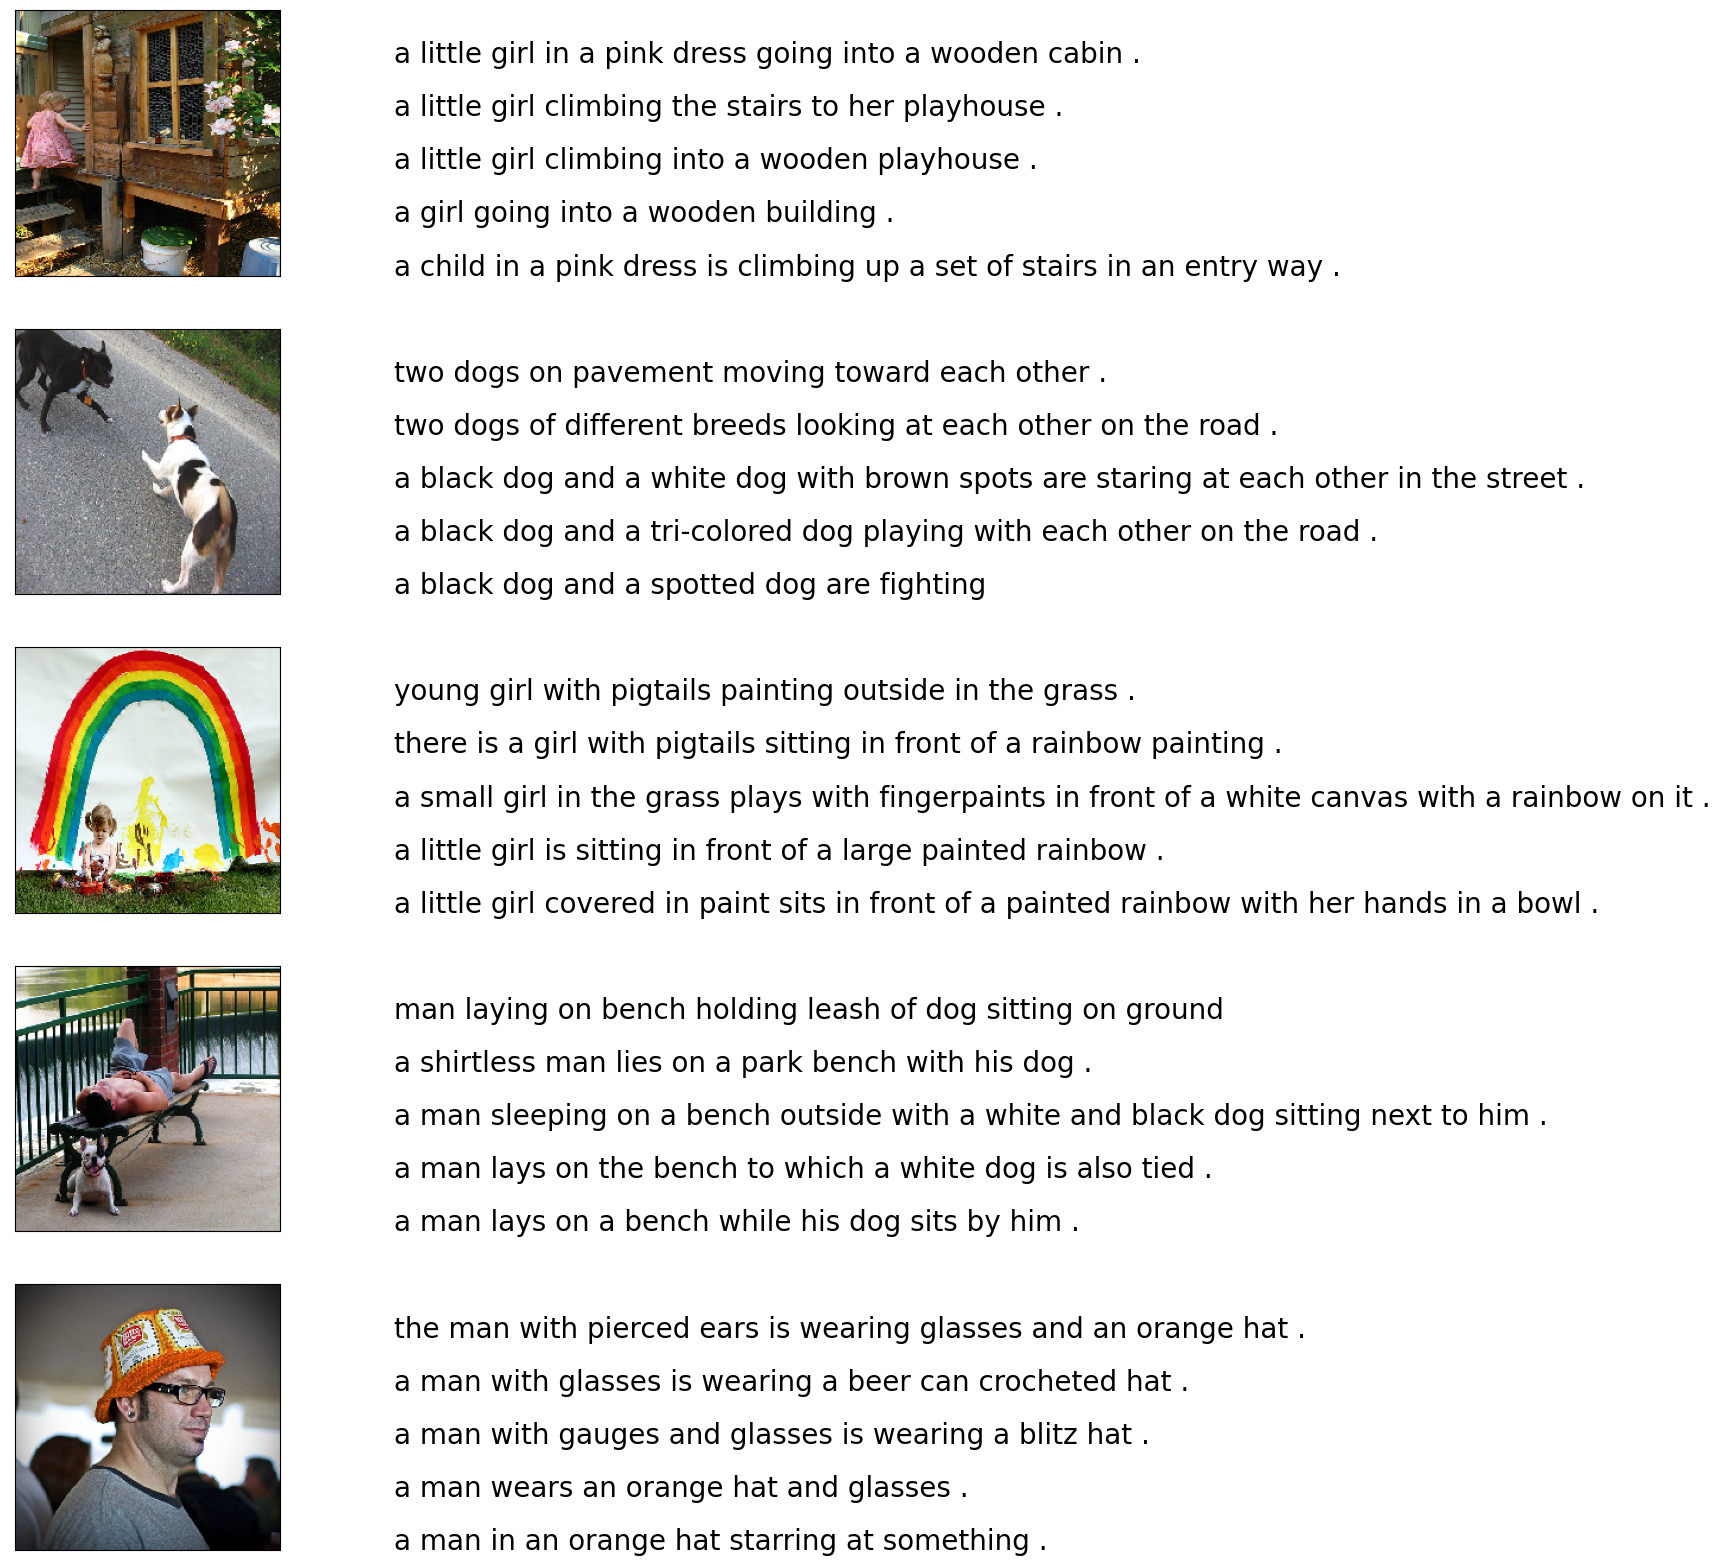

In [42]:
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt

npic = 5
npix = 224
target_size = (npix,npix,3)

count = 1
fig = plt.figure(figsize=(10,20))
for jpgfnm in uni_filenames[:npic]:
    filename = dir_Flickr_jpg + '/' + jpgfnm
    captions = list(df_txt["caption"].loc[df_txt["filename"]==jpgfnm].values)
    image_load = load_img(filename, target_size=target_size)
    
    ax = fig.add_subplot(npic,2,count,xticks=[],yticks=[])
    ax.imshow(image_load)
    
    count+= 1
    ax = fig.add_subplot(npic,2,count)
    plt.axis('off')
    ax.plot()
    ax.set_xlim(0,1)
    ax.set_ylim(0,len(captions))
    for i, caption in enumerate(captions):
        ax.text(0,i,caption,fontsize=20)
    count+=1
plt.show()

In [44]:
def df_word(df_txt):
    vocabulary = []
    for txt in df_txt.caption.values:
        vocabulary.extend(txt.split())
    print('Vocabulary Size: %d' % len(set(vocabulary)))
    ct = Counter(vocabulary)
    dfword = pd.DataFrame(list(ct.items()), columns=['word', 'count'])
    dfword.sort_values(by='count' , ascending = False, inplace= True)
    dfword = dfword.reset_index()[["word","count"]]
    return(dfword)

dfword = df_word(df_txt)
dfword.head(3)

Vocabulary Size: 8918


word  count
0    a  62989
1    .  36581
2   in  18975

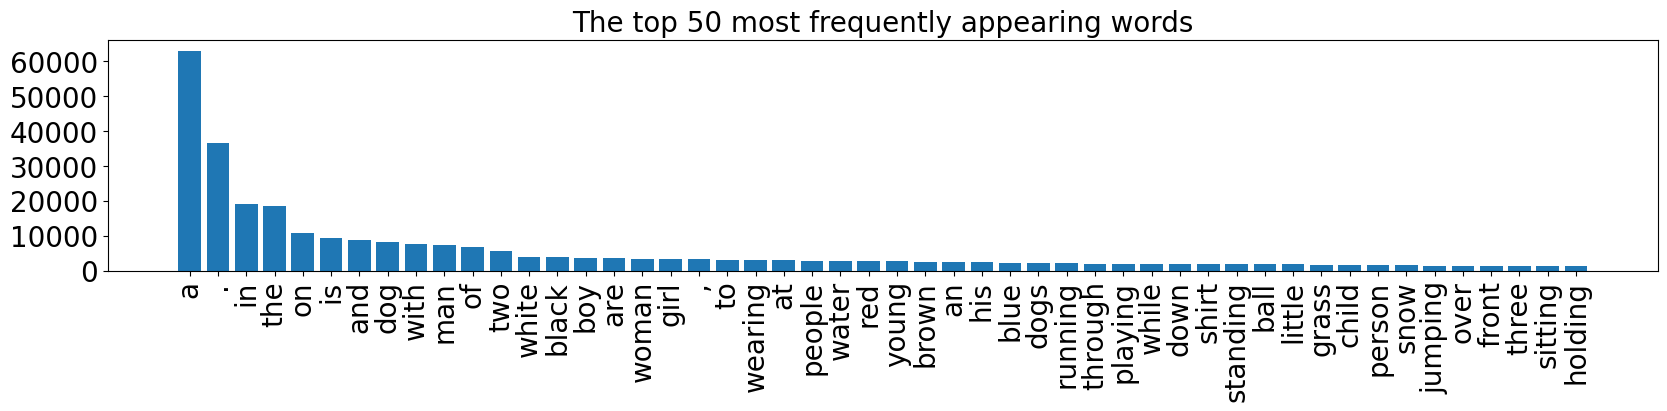

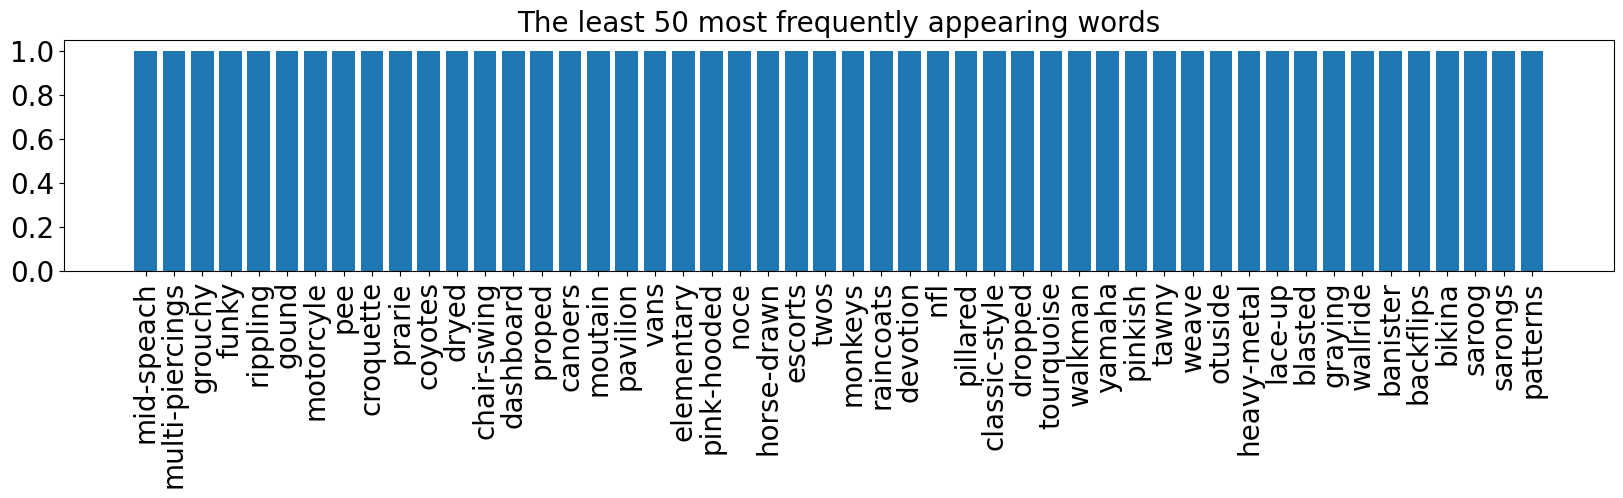

In [45]:
topn = 50

def plthist(dfsub, title = "The top 50 most frequently appearing words"):
    plt.figure(figsize=(20,3))
    plt.bar(dfsub.index,dfsub["count"])
    plt.yticks(fontsize=20)
    plt.xticks(dfsub.index,dfsub["word"],rotation=90,fontsize=20)
    plt.title(title,fontsize=20)
    plt.show()
    
plthist(dfword.iloc[:topn,:],title="The top 50 most frequently appearing words")
plthist(dfword.iloc[-topn:,:], title="The least 50 most frequently appearing words")

In [48]:
import string
text_original = "I scored 21 in NLP, but Akshat topped. I have python v3.8.It's 5:19 pm.Could you give us 20 on 20?"

print(text_original)

print("\n Remove Punctuations..")
def remove_punctuation(text_original):
    text_no_punctuation = text_original.translate(str.maketrans('','',string.punctuation))
    return(text_no_punctuation)

text_no_punctuation = remove_punctuation(text_original)
print(text_no_punctuation)

print("\n Remove a single character word..")
def remove_single_character(text):
    text_len_more_than1 = ""
    for word in text.split():
        if len(word) > 1:
            text_len_more_than1 += " " + word
    return(text_len_more_than1)
text_len_more_than1 = remove_single_character(text_no_punctuation)
print(text_len_more_than1)

print("\n Remove words with numeric values..")
def remove_numeric(text,printTF=False):
    text_no_numeric=""
    for word in text.split():
        isalpha = word.isalpha()
        if printTF:
            print(" {:10} : {:}".format(word,isalpha))
        if isalpha:
            text_no_numeric += " " + word
    return(text_no_numeric)

text_no_numeric = remove_numeric(text_len_more_than1,printTF=True)
print(text_no_numeric)
    

I scored 21 in NLP, but Akshat topped. I have python v3.8.It's 5:19 pm.Could you give us 20 on 20?

 Remove Punctuations..
I scored 21 in NLP but Akshat topped I have python v38Its 519 pmCould you give us 20 on 20

 Remove a single character word..
 scored 21 in NLP but Akshat topped have python v38Its 519 pmCould you give us 20 on 20

 Remove words with numeric values..
 scored     : True
 21         : False
 in         : True
 NLP        : True
 but        : True
 Akshat     : True
 topped     : True
 have       : True
 python     : True
 v38Its     : False
 519        : False
 pmCould    : True
 you        : True
 give       : True
 us         : True
 20         : False
 on         : True
 20         : False
 scored in NLP but Akshat topped have python pmCould you give us on


In [49]:
def text_clean(text_original):
    text = remove_punctuation(text_original)
    text = remove_single_character(text)
    text = remove_numeric(text)
    return(text)

for i, caption in enumerate(df_txt.caption.values):
    newcaption = text_clean(caption)
    df_txt["caption"].iloc[i] = newcaption

Vocabulary Size: 8763


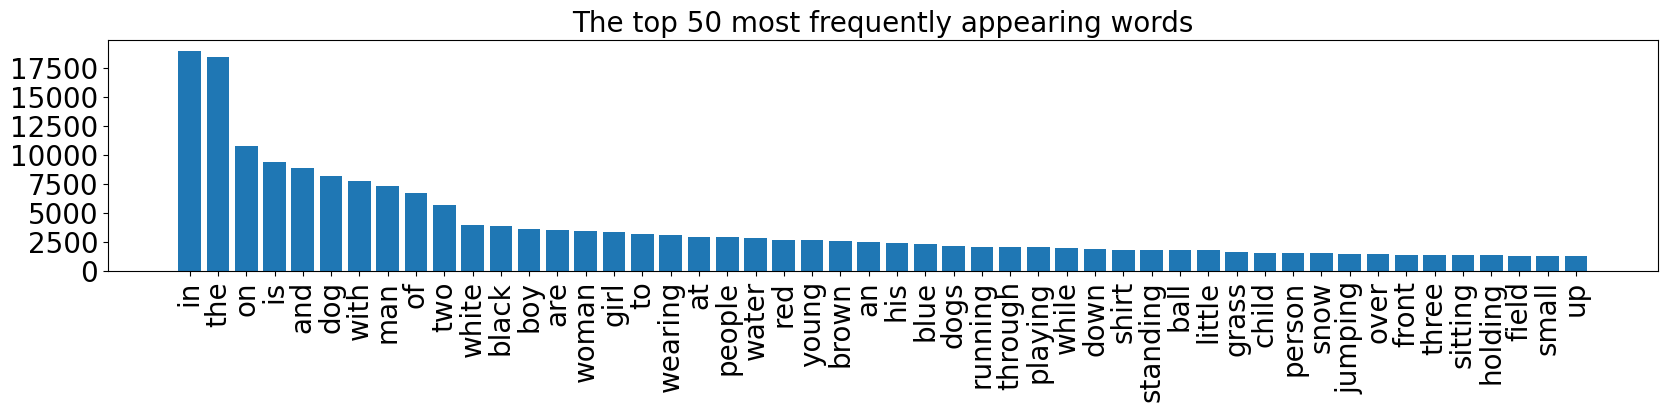

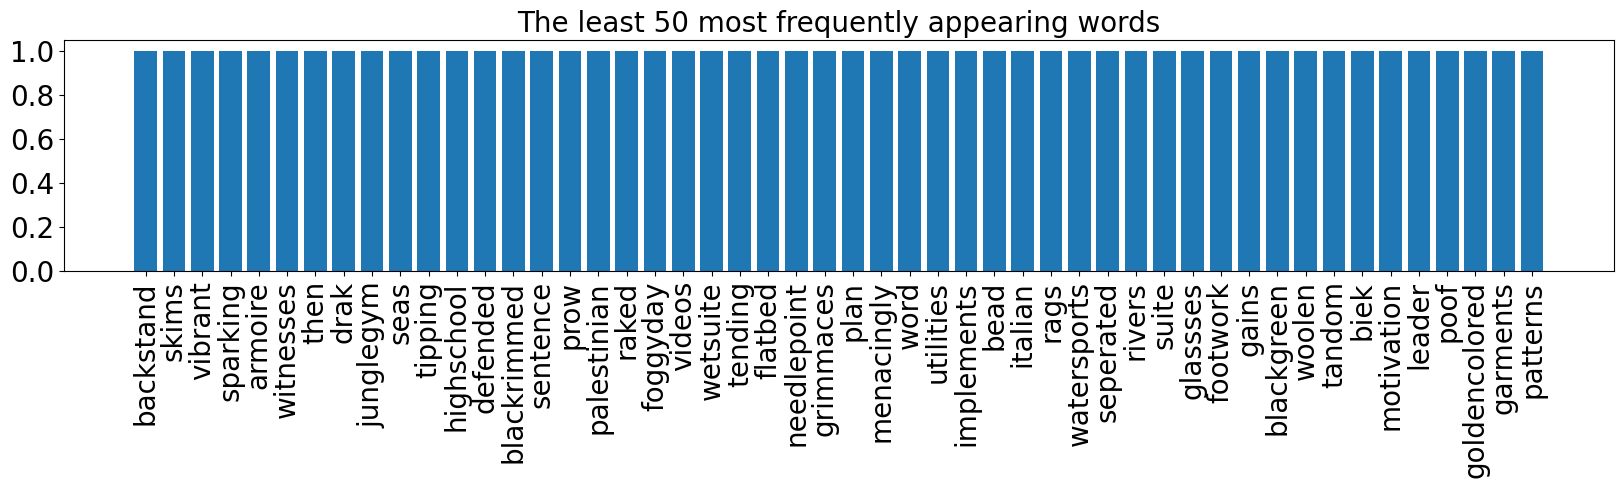

In [50]:
dfword = df_word(df_txt)
plthist(dfword.iloc[:topn,:], title="The top 50 most frequently appearing words")
plthist(dfword.iloc[-topn:,:],title="The least 50 most frequently appearing words")

In [51]:
from copy import copy

In [52]:
def add_start_end_seq_token(captions):
    caps=[]
    for txt in captions:
        txt = 'startseq '+txt+ ' endseq'
        caps.append(txt)
    return(caps)
df_txt0 = copy(df_txt)
df_txt0["caption"] = add_start_end_seq_token(df_txt["caption"])
df_txt0.head(5)
del df_txt

In [53]:
modelvgg = tf.keras.applications.VGG16(include_top = True, weights=None)
modelvgg.load_weights("C:/Users/ishwa/Desktop/imageCaptionGenerator/vgg16_weights_tf_dim_ordering_tf_kernels.h5")
modelvgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [54]:
modelvgg.layers.pop()
modelvgg = tf.keras.Model(inputs = modelvgg.inputs, outputs = modelvgg.layers[-2].output)
modelvgg.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [59]:
from tensorflow.keras.utils import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
from collections import OrderedDict

images = OrderedDict()
npix = 224
target_size = (npix,npix,3)
data = np.zeros((len(jpgs),npix,npix,3))
for i,name in enumerate(jpgs):
    filename = dir_Flickr_jpg + '/' + name
    image = load_img(filename, target_size=target_size)
    
    image = img_to_array(image)
    nimage = preprocess_input(image)
    
    y_pred = modelvgg.predict(nimage.reshape((1,)+nimage.shape[:3]))
    images[name] = y_pred.flatten()
    

In [60]:
len(images)

8091

In [61]:
dimages, keepindex = [],[]
df_txt0 = df_txt0.loc[df_txt0["index"].values == "0",: ]
for i, fnm in enumerate(df_txt0.filename):
    if fnm in images.keys():
        dimages.append(images[fnm])
        keepindex.append(i)
        
fnames=df_txt0["filename"].iloc[keepindex].values
dcaptions = df_txt0["caption"].iloc[keepindex].values
dimages = np.array(dimages)

In [62]:
dimages.shape

(8091, 4096)

In [64]:
dcaptions[:5]

array(['startseq  child in pink dress is climbing up set of stairs in an entry way endseq',
       'startseq  black dog and spotted dog are fighting endseq',
       'startseq  little girl covered in paint sits in front of painted rainbow with her hands in bowl endseq',
       'startseq  man lays on bench while his dog sits by him endseq',
       'startseq  man in an orange hat starring at something endseq'],
      dtype=object)

In [65]:
from keras.preprocessing.text import Tokenizer
nb_words = 8000
tokenizer = Tokenizer(nb_words=nb_words)
tokenizer.fit_on_texts(dcaptions)
vocab_size = len(tokenizer.word_index) + 1
print("vocabulary size : {}".format(vocab_size))
dtexts = tokenizer.texts_to_sequences(dcaptions)

vocabulary size : 4476


In [66]:
dtexts[:5]

[[1, 38, 3, 66, 144, 7, 124, 52, 406, 9, 367, 3, 24, 2351, 522, 2],
 [1, 12, 8, 5, 752, 8, 17, 368, 2],
 [1, 48, 15, 170, 3, 584, 101, 3, 41, 9, 551, 1198, 11, 55, 213, 3, 1076, 2],
 [1, 10, 621, 6, 150, 27, 23, 8, 101, 46, 112, 2],
 [1, 10, 3, 24, 82, 96, 1199, 19, 162, 2]]

In [67]:
prop_test, prop_val = 0.2,0.2
N = len(dtexts)

Ntest , Nval = int(N*prop_test), int(N*prop_val)

def split_test_val_train(dtexts,Ntest,Nval):
    return(dtexts[:Ntest],dtexts[Ntest:Ntest+Nval],dtexts[Ntest+Nval:])

dt_test, dt_val, dt_train = split_test_val_train(dtexts,Ntest,Nval)
di_test, di_val, di_train = split_test_val_train(dimages,Ntest,Nval)
fnm_test, fnm_val, fnm_train = split_test_val_train(fnames,Ntest,Nval)

In [68]:
maxlen = np.max([len(text) for text in dtexts])

In [73]:
from keras_preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

def preprocessing(dtexts,dimages):
    N = len(dtexts)
    print("# captions/images = {}".format(N))
    
    assert(N==len(dimages))
    Xtext, Ximage, ytext =[],[],[]
    
    for text, image in zip(dtexts,dimages):
        for i in range(1,len(text)):
            in_text, out_text = text[:i],text[i]
            in_text = pad_sequences([in_text],maxlen=maxlen).flatten()
            out_text = to_categorical(out_text,num_classes = vocab_size)
            
            Xtext.append(in_text)
            Ximage.append(image)
            ytext.append(out_text)
            
    Xtext = np.array(Xtext)
    Ximage = np.array(Ximage)
    ytext = np.array(ytext)
    print("{} {} {}".format(Xtext.shape,Ximage.shape,ytext.shape))
    return(Xtext,Ximage,ytext)

Xtext_train, Ximage_train, ytext_train = preprocessing(dt_train,di_train)
Xtext_val, Ximage_val, ytext_val = preprocessing(dt_val,di_val)


# captions/images = 4855
(49631, 30) (49631, 4096) (49631, 4476)
# captions/images = 1618
(16353, 30) (16353, 4096) (16353, 4476)


In [75]:
Xtext_train[:14]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    1],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    1,   75],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    1,   75,   38],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    1,   75,   38,   33],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    1, 

In [76]:
Ximage_train.shape

(49631, 4096)

In [77]:
ytext_train.shape

(49631, 4476)

In [79]:
from tensorflow.keras import layers
print(vocab_size)

dim_embedding = 64

input_image = layers.Input(shape=(Ximage_train.shape[1],))
fimage = layers.Dense(256,activation='relu',name="ImageFeature")(input_image)

input_txt = layers.Input(shape=(maxlen,))

ftxt = layers.Embedding(vocab_size,dim_embedding, mask_zero=True)(input_txt)
ftxt = layers.LSTM(256,name="CaptionFeature")(ftxt)

decoder = layers.add([ftxt,fimage])
decoder = layers.Dense(256,activation='relu')(decoder)
output = layers.Dense(vocab_size,activation='softmax')(decoder)
model = tf.keras.Model(inputs=[input_image,input_txt],outputs=output)

model.compile(loss='categorical_crossentropy',optimizer ='adam')

print(model.summary())

4476
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 30)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 30, 64)       286464      ['input_4[0][0]']                
                                                                                                  
 input_3 (InputLayer)           [(None, 4096)]       0           []                               
                                                                                                  
 CaptionFeature (LSTM)          (None, 256)          328704      ['e

In [80]:
start =time.time()

hist = model.fit([Ximage_train, Xtext_train],ytext_train,epochs=5, verbose=2,
                batch_size=64,validation_data=([Ximage_val,Xtext_val], ytext_val))

end = time.time()
print("TIME TOOK {:3.2f}MIN".format((end-start)/60))

Train on 49631 samples, validate on 16353 samples
Epoch 1/5
49631/49631 - 69s - loss: 5.3148 - val_loss: 4.7705 - 69s/epoch - 1ms/sample
Epoch 2/5
49631/49631 - 65s - loss: 4.3409 - val_loss: 4.4832 - 65s/epoch - 1ms/sample
Epoch 3/5
49631/49631 - 64s - loss: 3.8891 - val_loss: 4.4345 - 64s/epoch - 1ms/sample
Epoch 4/5
49631/49631 - 64s - loss: 3.5697 - val_loss: 4.4343 - 64s/epoch - 1ms/sample
Epoch 5/5
49631/49631 - 65s - loss: 3.3015 - val_loss: 4.5367 - 65s/epoch - 1ms/sample
TIME TOOK 5.47MIN


In [81]:
print(Ximage_train.shape,Xtext_train.shape,ytext_train.shape)

(49631, 4096) (49631, 30) (49631, 4476)


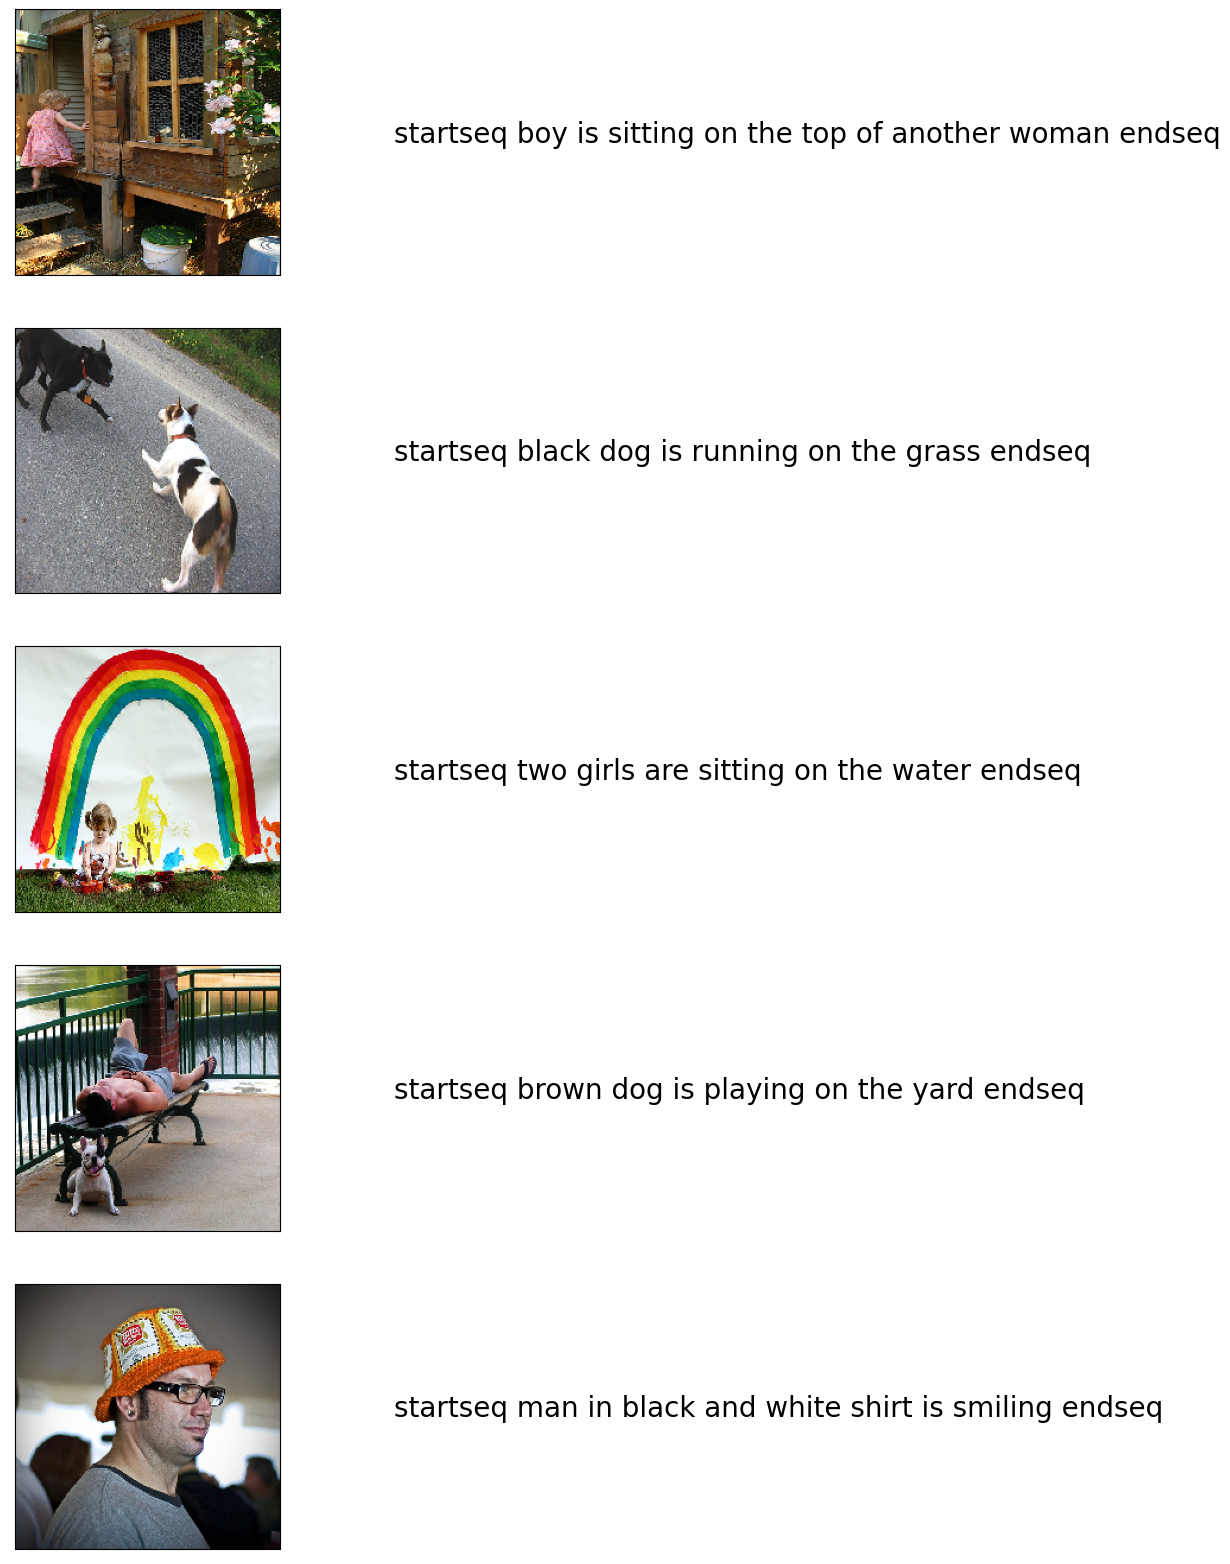

In [84]:
index_word = dict([(index,word) for word, index in tokenizer.word_index.items()])

def predict_caption(image):
    
    in_text = 'startseq'
    
    for iword in range(maxlen):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence],maxlen)
        yhat = model.predict([image,sequence],verbose=0)
        yhat = np.argmax(yhat)
        newword = index_word[yhat]
        in_text += " " + newword
        if newword == "endseq":
            break
    return(in_text)

npic = 5
npix = 224
target_size = (npix,npix,3)

count = 1
fig = plt.figure(figsize=(10,20))
for jpgfnm, image_feature in zip(fnm_test[:npic],di_test[:npic]):
    filename = dir_Flickr_jpg + '/' + jpgfnm
    image_load = load_img(filename, target_size=target_size)
    ax = fig.add_subplot(npic,2,count,xticks=[],yticks=[])
    ax.imshow(image_load)
    count += 1
    
    caption = predict_caption(image_feature.reshape(1,len(image_feature)))
    ax = fig.add_subplot(npic,2,count)
    plt.axis('off')
    ax.plot()
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.text(0,0.5,caption,fontsize=20)
    count += 1

plt.show()

In [92]:
start = time.time()

from nltk.translate.bleu_score import sentence_bleu
index_word = dict([(index,word) for word,index in tokenizer.word_index.items()])

nkeep = 5
pred_good, pred_bad, bleus = [],[],[]
count = 0
for jpgnm, image_feature, tokenized_text in zip(fnm_test,di_test,dt_test):
    count+=1
    if count % 200 == 0:
        print(" {:4.2f}% is done..".format(100*count/float(len(fnm_test))))
        
    caption_true = [index_word[i] for i in tokenized_text]
    caption_true = caption_true[1:-1]
    
    caption = predict_caption(image_feature.reshape(1,len(image_feature)))
    caption = caption.split()
    
    caption = caption[1:-1]
    
    bleu = sentence_bleu([caption_true],caption)
    bleus.append(bleu)
  
    if bleu>0.6 and len(pred_good) < nkeep:
        pred_good.append((bleu,jpgfnm,caption_true,caption))
    elif bleu<0.3 and len(pred_bad) < nkeep:
        pred_bad.append((bleu,jpgfnm,caption_true,caption))
    
end = time.time()
print((start-end)/60)

 12.36% is done..
 24.72% is done..
 37.08% is done..
 49.44% is done..
 61.80% is done..
 74.17% is done..
 86.53% is done..
 98.89% is done..
-1.0791568954785664


In [93]:
pred_good

[(0.6065306597126334,
  '1007129816_e794419615.jpg',
  ['brown', 'and', 'white', 'dog', 'is', 'running', 'through', 'the', 'snow'],
  ['dog', 'is', 'running', 'through', 'the', 'snow']),
 (0.8091067115702212,
  '1007129816_e794419615.jpg',
  ['the', 'children', 'are', 'playing', 'in', 'the', 'water'],
  ['two', 'children', 'are', 'playing', 'in', 'the', 'water']),
 (0.6104735835807844,
  '1007129816_e794419615.jpg',
  ['black', 'and', 'white', 'dog', 'is', 'running', 'through', 'the', 'field'],
  ['black', 'and', 'white', 'dog', 'is', 'running', 'in', 'the', 'grass']),
 (1.0,
  '1007129816_e794419615.jpg',
  ['black', 'dog', 'is', 'running', 'in', 'the', 'water'],
  ['black', 'dog', 'is', 'running', 'in', 'the', 'water'])]

In [94]:
pred_bad[:2]

[(7.176794039009363e-232,
  '1007129816_e794419615.jpg',
  ['child',
   'in',
   'pink',
   'dress',
   'is',
   'climbing',
   'up',
   'set',
   'of',
   'stairs',
   'in',
   'an',
   'entry',
   'way'],
  ['boy', 'is', 'sitting', 'on', 'the', 'top', 'of', 'another', 'woman']),
 (6.968148412761692e-155,
  '1007129816_e794419615.jpg',
  ['black', 'dog', 'and', 'spotted', 'dog', 'are', 'fighting'],
  ['black', 'dog', 'is', 'running', 'on', 'the', 'grass'])]

In [96]:
print("Mean BLEU {:4.3f}".format(np.mean(bleus)))

Mean BLEU 0.010


Bad caption


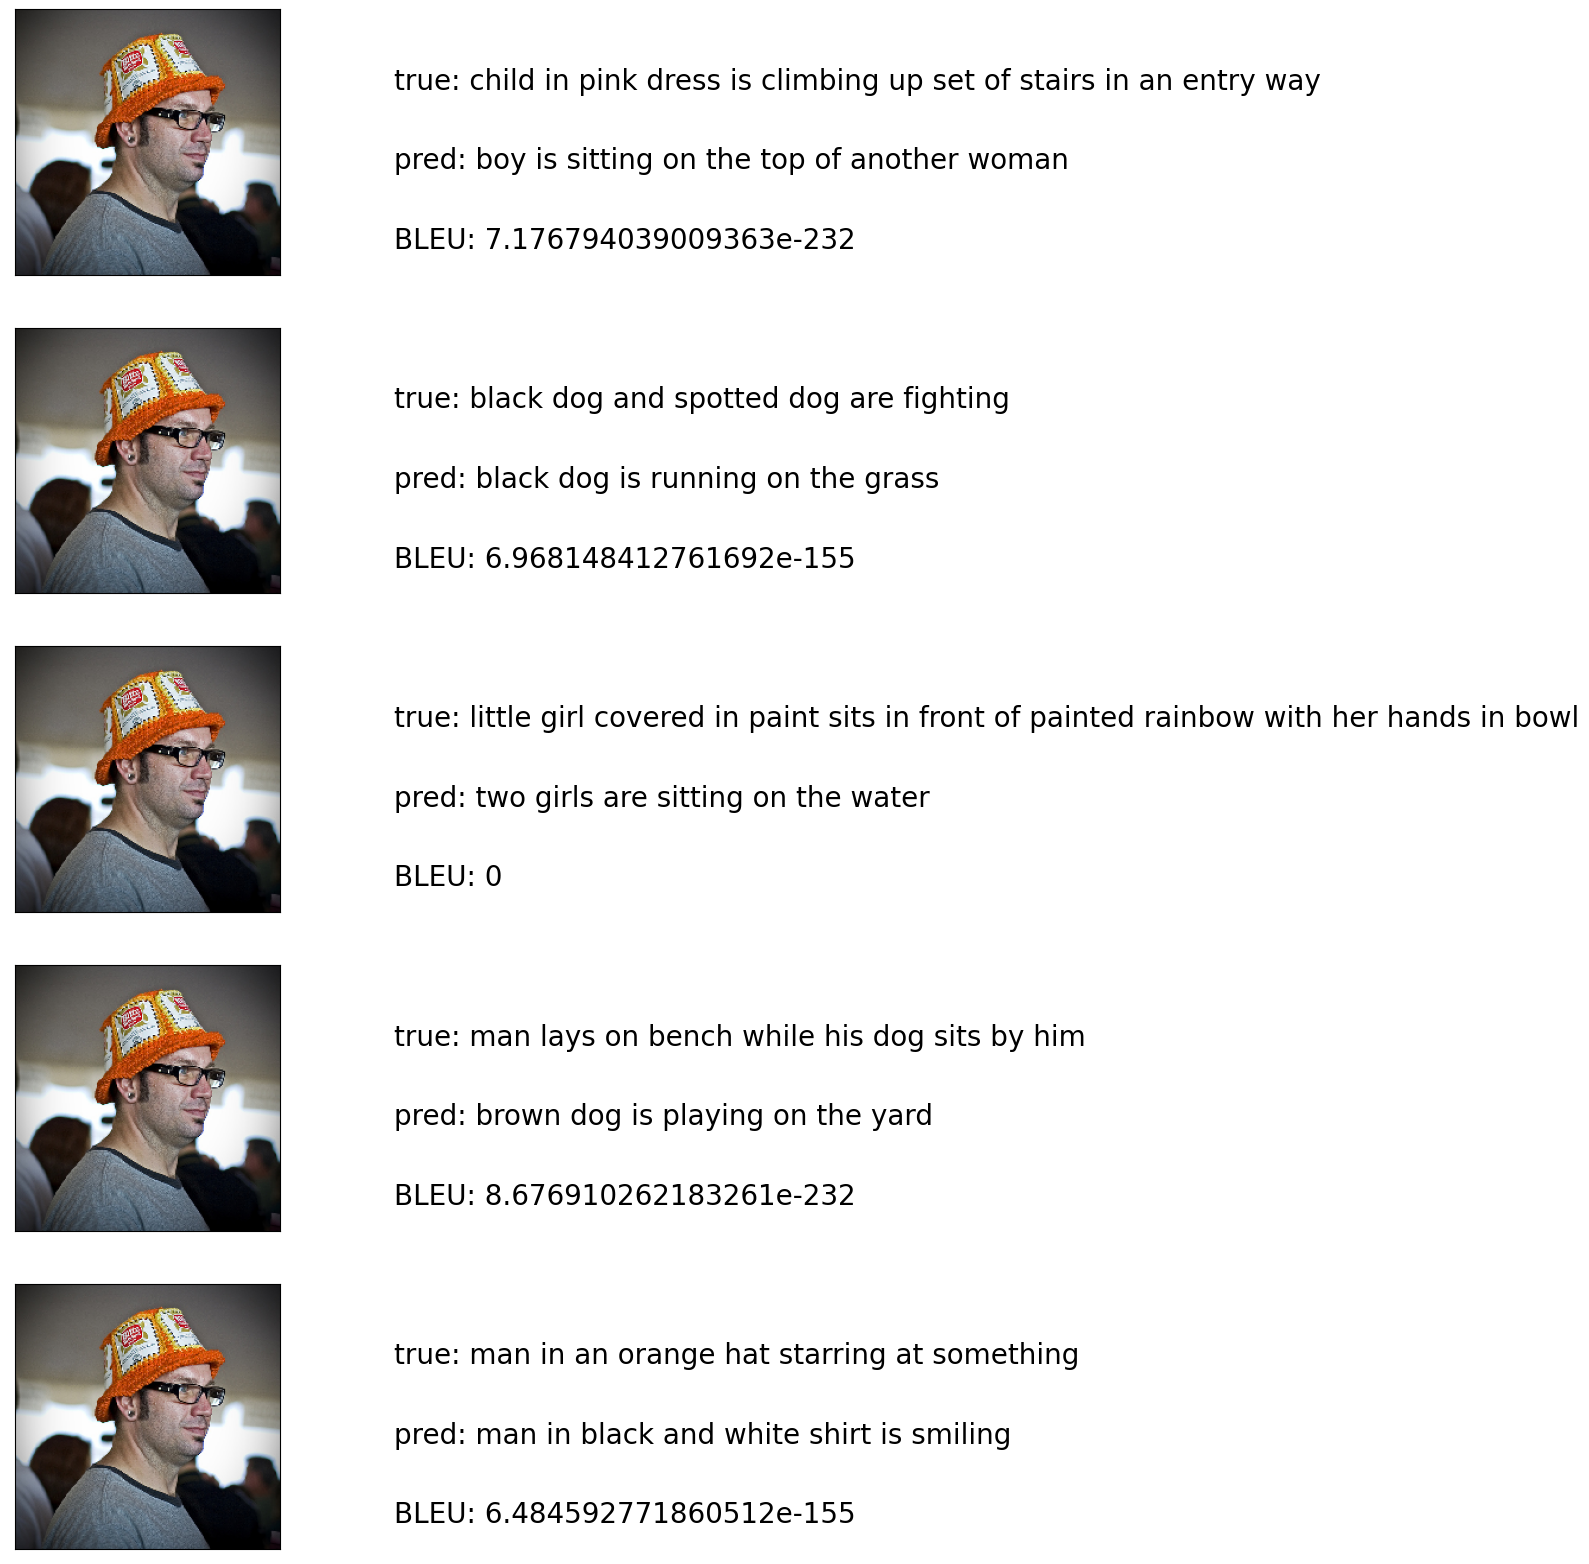

Good caption


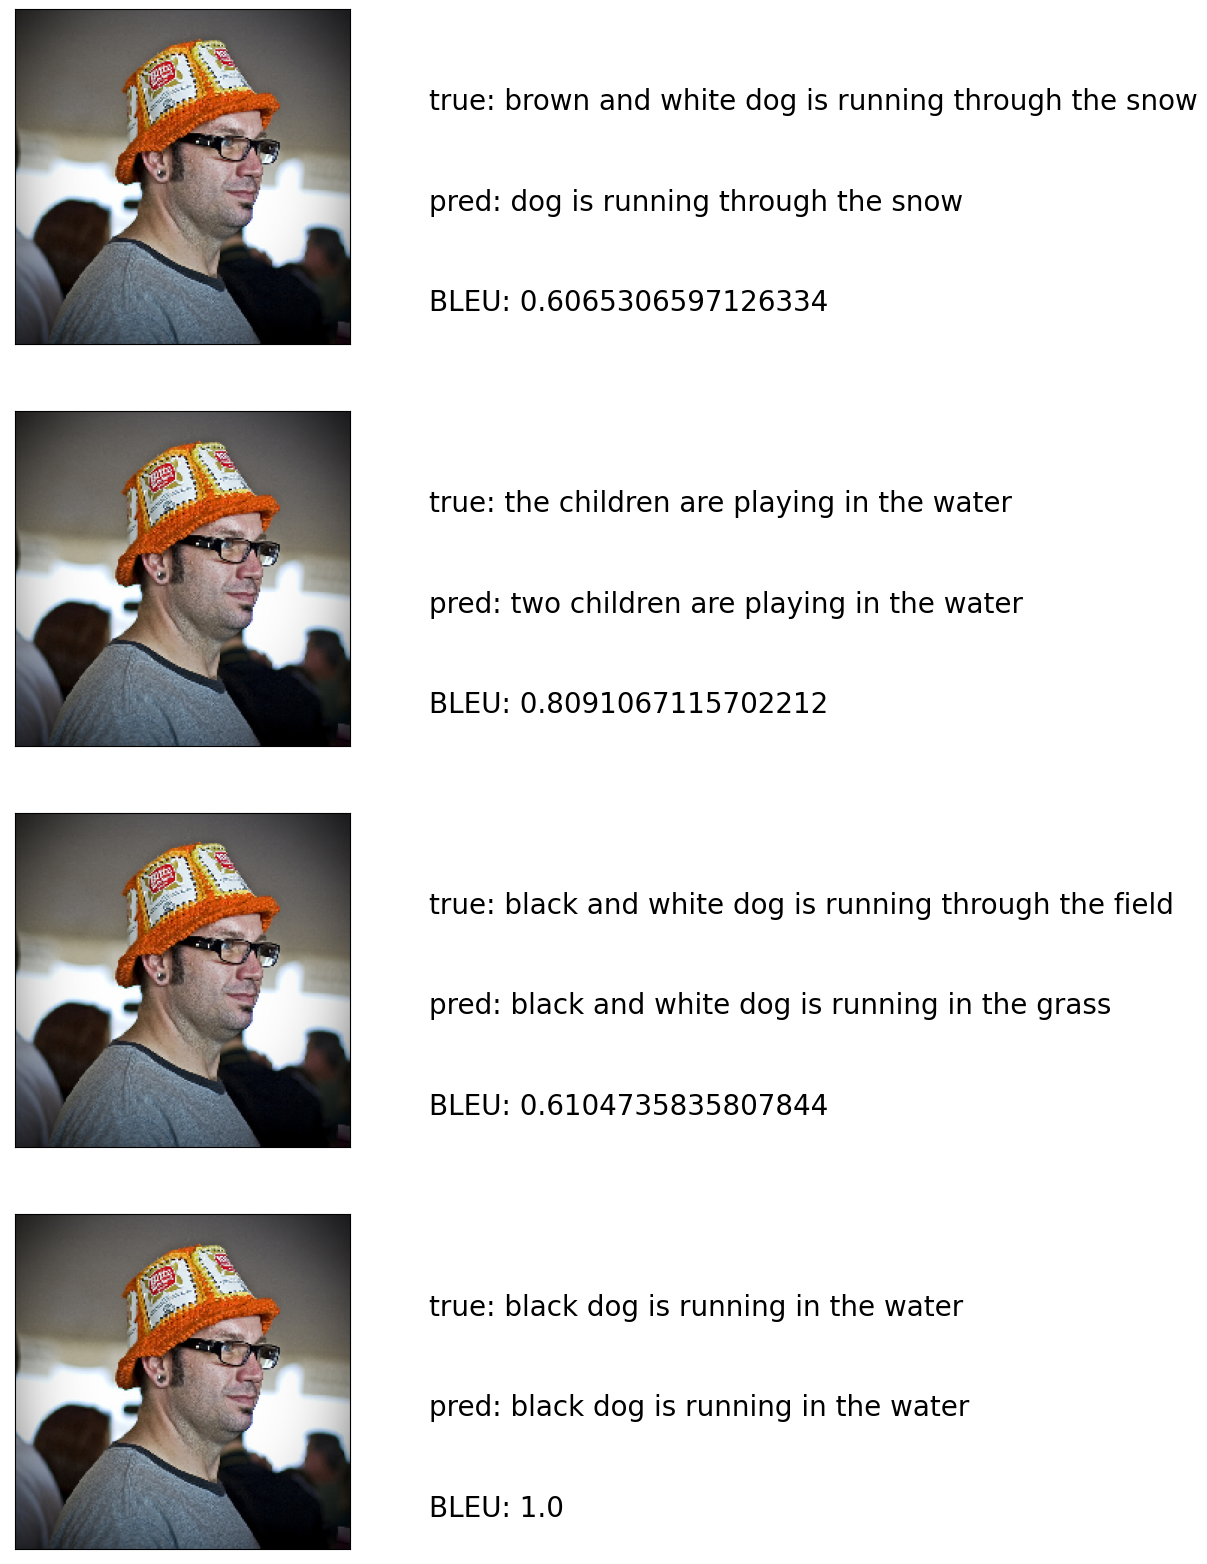

In [100]:
def plot_images(pred_bad):
    def create_str(caption_true):
        strue =""
        for s in caption_true:
            strue += " " + s
        return(strue)
    npix = 224
    target_size = (npix,npix,3)
    count = 1
    fig = plt.figure(figsize=(10,20))
    npic = len(pred_bad)
    for pb in pred_bad:
        bleu,jpgfnm,caption_true,caption = pb
    
        filename = dir_Flickr_jpg + '/' + jpgfnm
        image_load = load_img(filename, target_size=target_size)
        ax = fig.add_subplot(npic,2,count,xticks=[],yticks=[])
        ax.imshow(image_load)
        count += 1
    
        caption_true = create_str(caption_true)
        caption = create_str(caption)
    
        ax = fig.add_subplot(npic,2,count)
        plt.axis('off')
        ax.plot()
        ax.set_xlim(0,1)
        ax.set_ylim(0,1)
        ax.text(0,0.7,"true:"+ caption_true,fontsize=20)
        ax.text(0,0.4,"pred:"+ caption,fontsize=20)
        ax.text(0,0.1,"BLEU: {}".format(bleu),fontsize=20)
        count+=1
    plt.show()

print("Bad caption")
plot_images(pred_bad)

print("Good caption")
plot_images(pred_good)

In [101]:
import tkinter as tk

In [102]:
from PIL import Image, ImageTk

In [103]:
from tkinter import filedialog
import os


In [118]:
def upload_img():
    global img, image_data
    for img_display in frame.winfo_children():
        img_display.destroy()
    
    image_data = filedialog.askopenfilename(initialdir="/", title="choose an image",
                                           filetypes=(("all files","*.*"),("png files", "*.png")))
    basewidth = 300
    img = Image.open(image_data)
    wpercent = (basewidth / float(img.size[0]))
    hsize = int((float(img.size[1])*float(wpercent)))
    img = img.resize((basewidth, hsize),Image.ANTIALIAS)
    img=ImageTk.PhotoImage(img)
    file_name = image_data.split('/')
    panel = tk.Label(frame, text = str(file_name[len(file_name)-1]).upper()).pack()
    panel_image = tk.Label(frame, image=img).pack()
    
def caption():
    
    original = Image.open(image_data)
    original = original.resize((224,224),Image.ANTIALIAS)
    numpy_image = img_to_array(original)
    nimage = preprocess_input(numpy_image)
    
    feature = modelvgg.predict(nimage.reshape((1,) +nimage.shape[:3]))
    caption = predict_caption(feature)
    table = tk.Label(frame,text = "Caption: "+ caption[9:-7], font =("Helvetica", 12)).pack()
    

In [122]:
root = tk.Tk()
root.title('Image Caption Generator')
#root.iconbitmap('class.ico')
root.resizable(False,False)
tit = tk.Label(root, text='Image Caption Generator', padx=25,pady=6,font =("", 12)).pack()
canvas = tk.Canvas(root, height=550,width = 600,bg='#D1EDf2')
canvas.pack()
frame = tk.Frame(root, bg='white')
frame.place(relwidth=0.8, relheight=0.8, relx=0.1,rely=0.1)
chose_image = tk.Button(root, text='Choose Image',padx = 35,pady=10,fg="black", bg="pink",
                       command = upload_img, activebackground="#add8e6")
chose_image.pack(side=tk.LEFT)

caption_image = tk.Button(root, text='Classify Image',
                         padx=35,pady=10,
                         fg="black", bg="pink",
                         command = caption,activebackground="#add8e6")
caption_image.pack(side=tk.RIGHT)
root.mainloop()